In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.shape

(1517, 14)

In [9]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

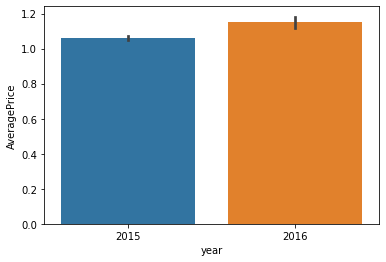

In [16]:
sns.barplot(x="year",y="AveragePrice",data=df)

maximum average price is in year 2016

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

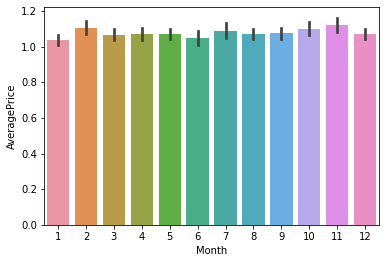

In [17]:
sns.barplot(x="Month",y="AveragePrice",data=df)

november and October are the month where max no of average price is there, but the thing is almost for whole year the price is almost same for the avocado this prove that there is so much craze of avocado rather than India.

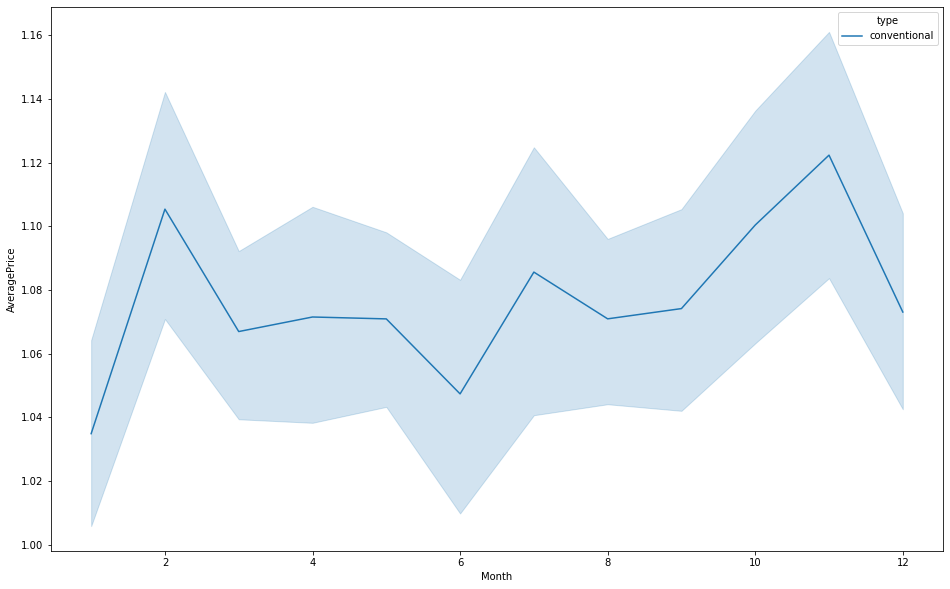

In [18]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Month",y="AveragePrice",hue='type',data=df)
plt.show()

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

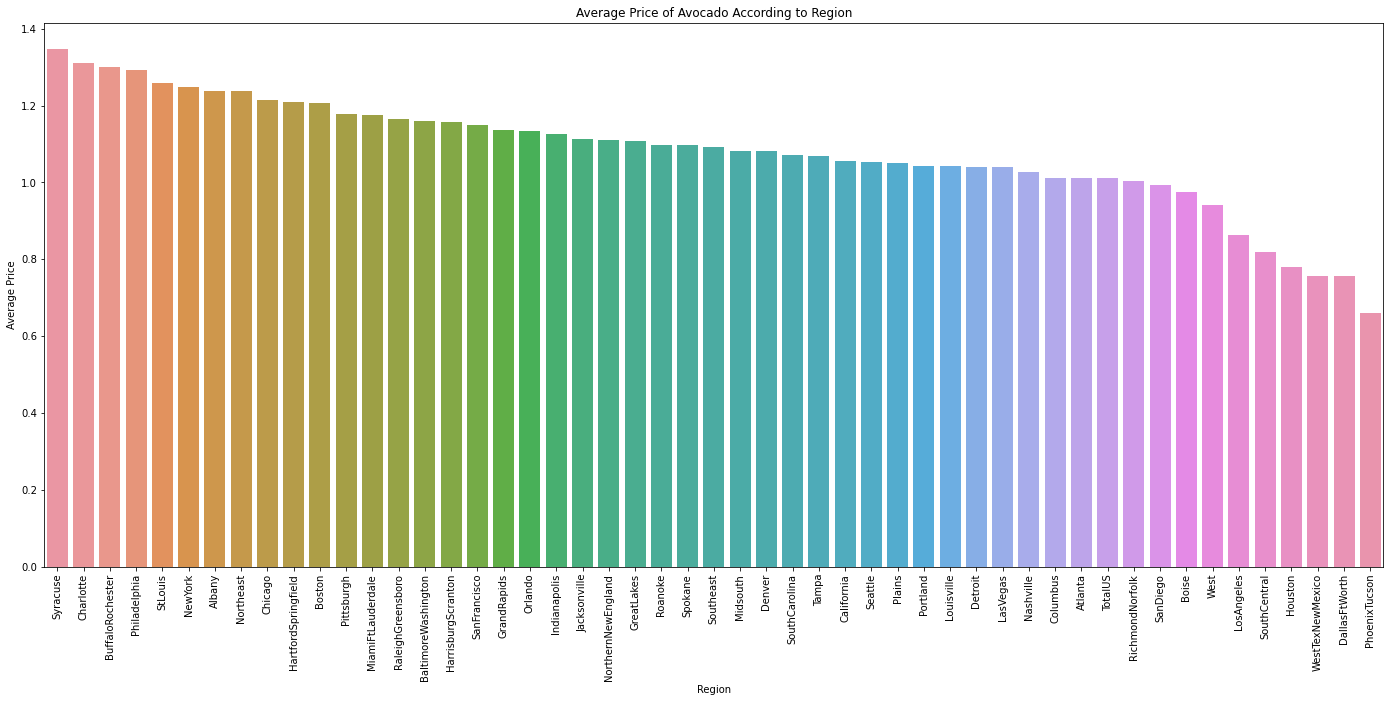

In [29]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Looks like these region are where price is very high

syracuse

charlotte

buffalorochester

Philadelphia

Stlouis

Text(0.5, 1.0, 'Average of Total Volume According to Region')

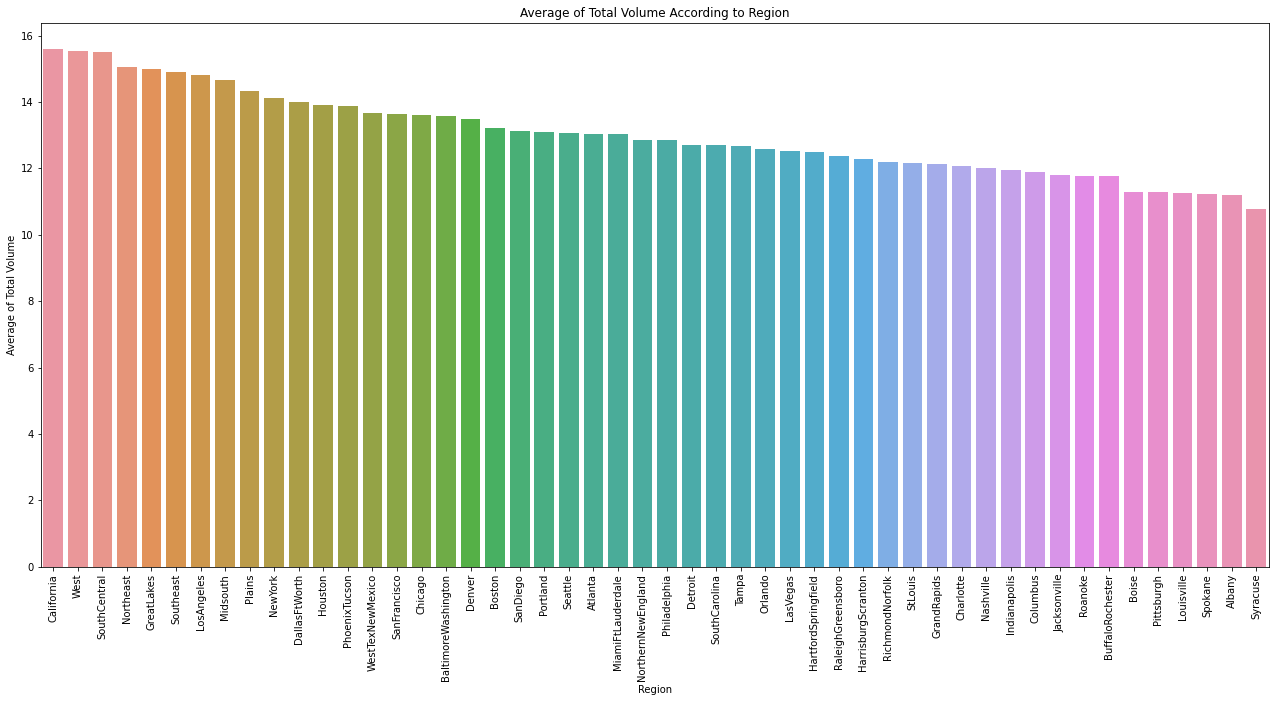

In [30]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

Looks like these region are where Consumption is very high

california

West

SouthCentral

Northeast

greatlakes

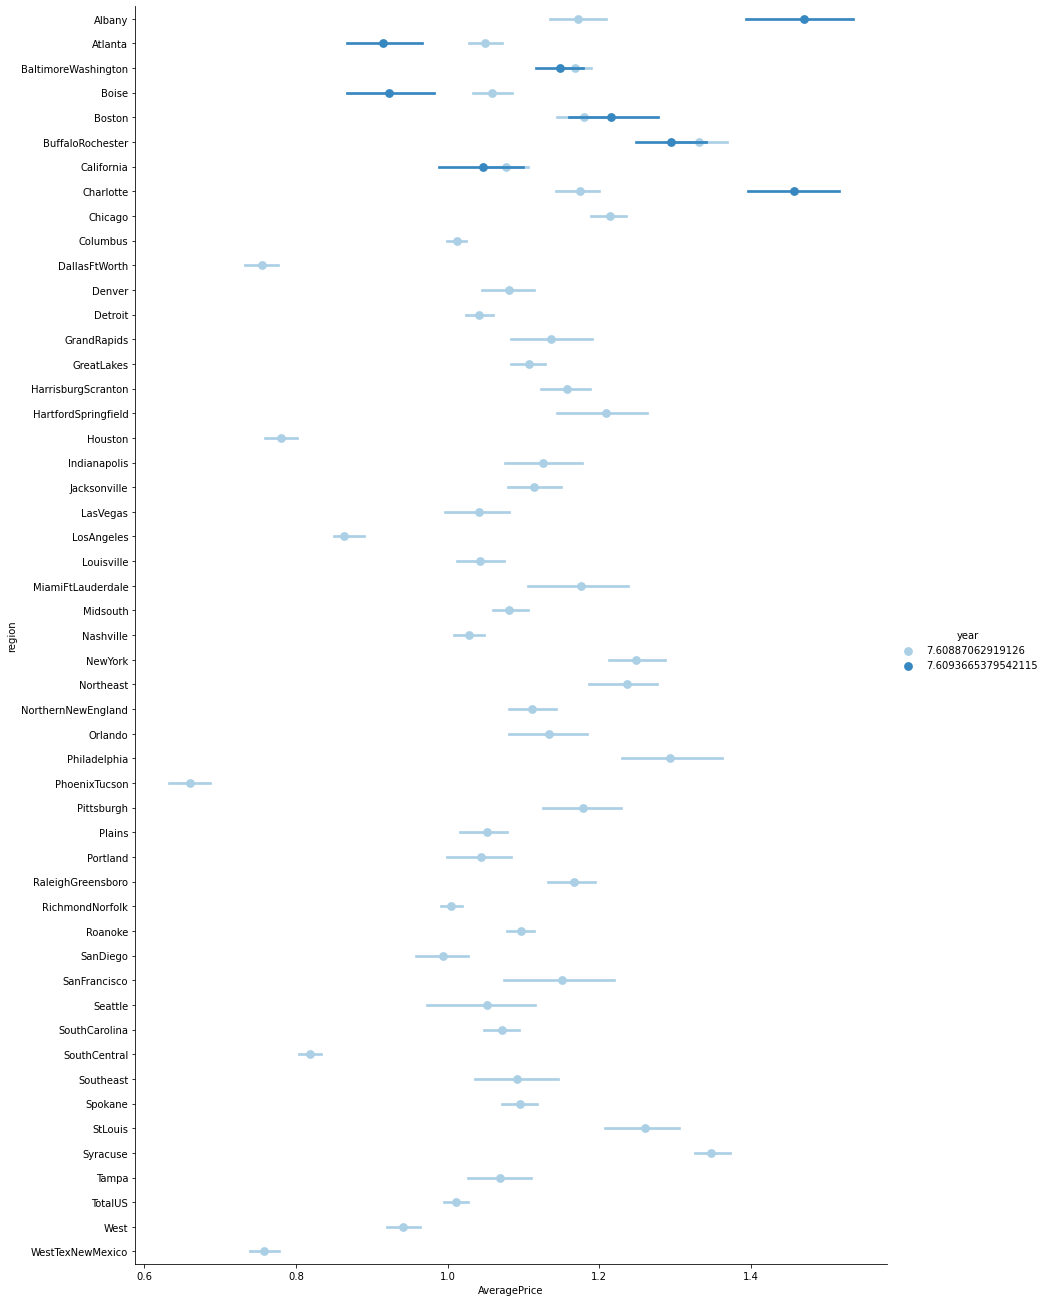

In [31]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

Text(0.5, 1.0, 'Average Price')

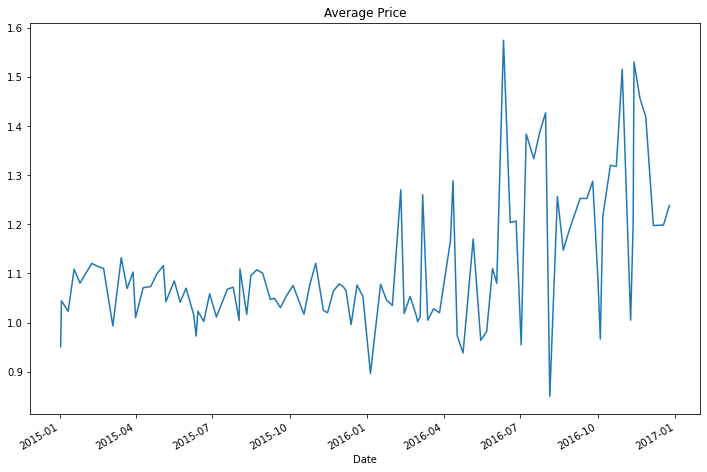

In [32]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

This also shows there was a huge hike in prices after July 2016 and before Jan 2017

In [34]:
cor=df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.326692,-0.511040,-0.129466,-0.289056,-0.190092,-0.149251,-0.214802,-0.064988,0.178683,0.060642,0.092589
Total Volume,-0.326692,1.000000,0.767171,0.890715,0.639882,0.938095,0.924203,0.587667,0.429998,0.003417,-0.070180,-0.048850
4046,-0.511040,0.767171,1.000000,0.456283,0.584634,0.655837,0.620573,0.522558,0.322105,-0.124610,-0.067074,-0.037744
4225,-0.129466,0.890715,0.456283,1.000000,0.552522,0.843787,0.851278,0.453820,0.382615,0.005161,-0.043650,-0.047734
4770,-0.289056,0.639882,0.584634,0.552522,1.000000,0.584306,0.597229,0.361404,0.563302,0.004865,-0.020798,0.001779
Total Bags,-0.190092,0.938095,0.655837,0.843787,0.584306,1.000000,0.985506,0.594606,0.490465,0.138461,-0.053407,-0.032262
Small Bags,-0.149251,0.924203,0.620573,0.851278,0.597229,0.985506,1.000000,0.499521,0.480714,0.168024,-0.057507,-0.025323
Large Bags,-0.214802,0.587667,0.522558,0.453820,0.361404,0.594606,0.499521,1.000000,0.283456,-0.112991,-0.038081,-0.037542
XLarge Bags,-0.064988,0.429998,0.322105,0.382615,0.563302,0.490465,0.480714,0.283456,1.000000,0.180988,0.061888,0.027220
year,0.178683,0.003417,-0.124610,0.005161,0.004865,0.138461,0.168024,-0.112991,0.180988,1.000000,-0.013144,0.029744


<AxesSubplot:>

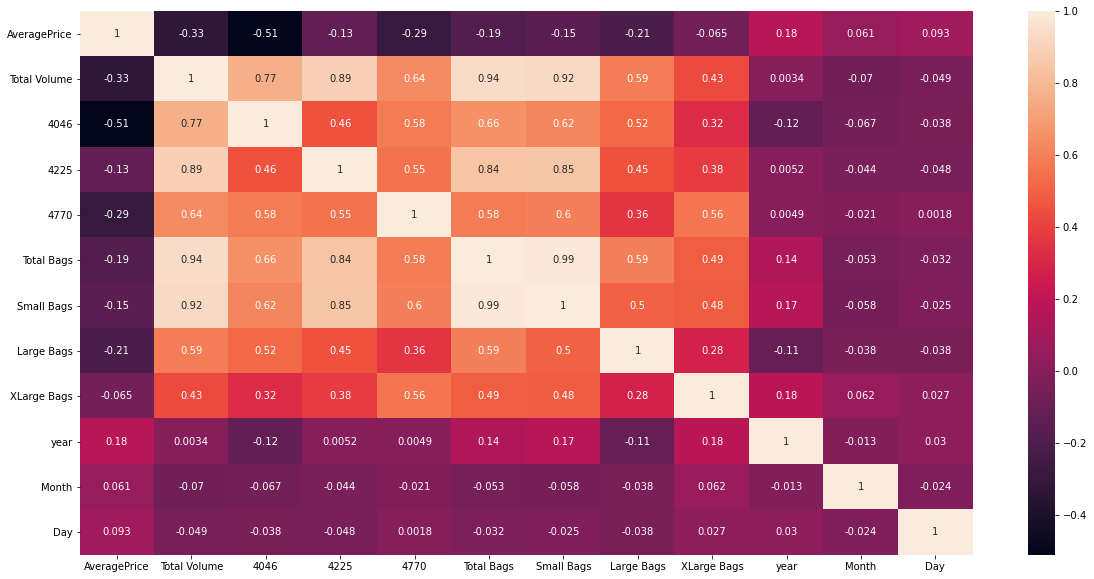

In [37]:
plt.figure(figsize=[20,10])
sns.heatmap(cor,annot=True)


array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'Day'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

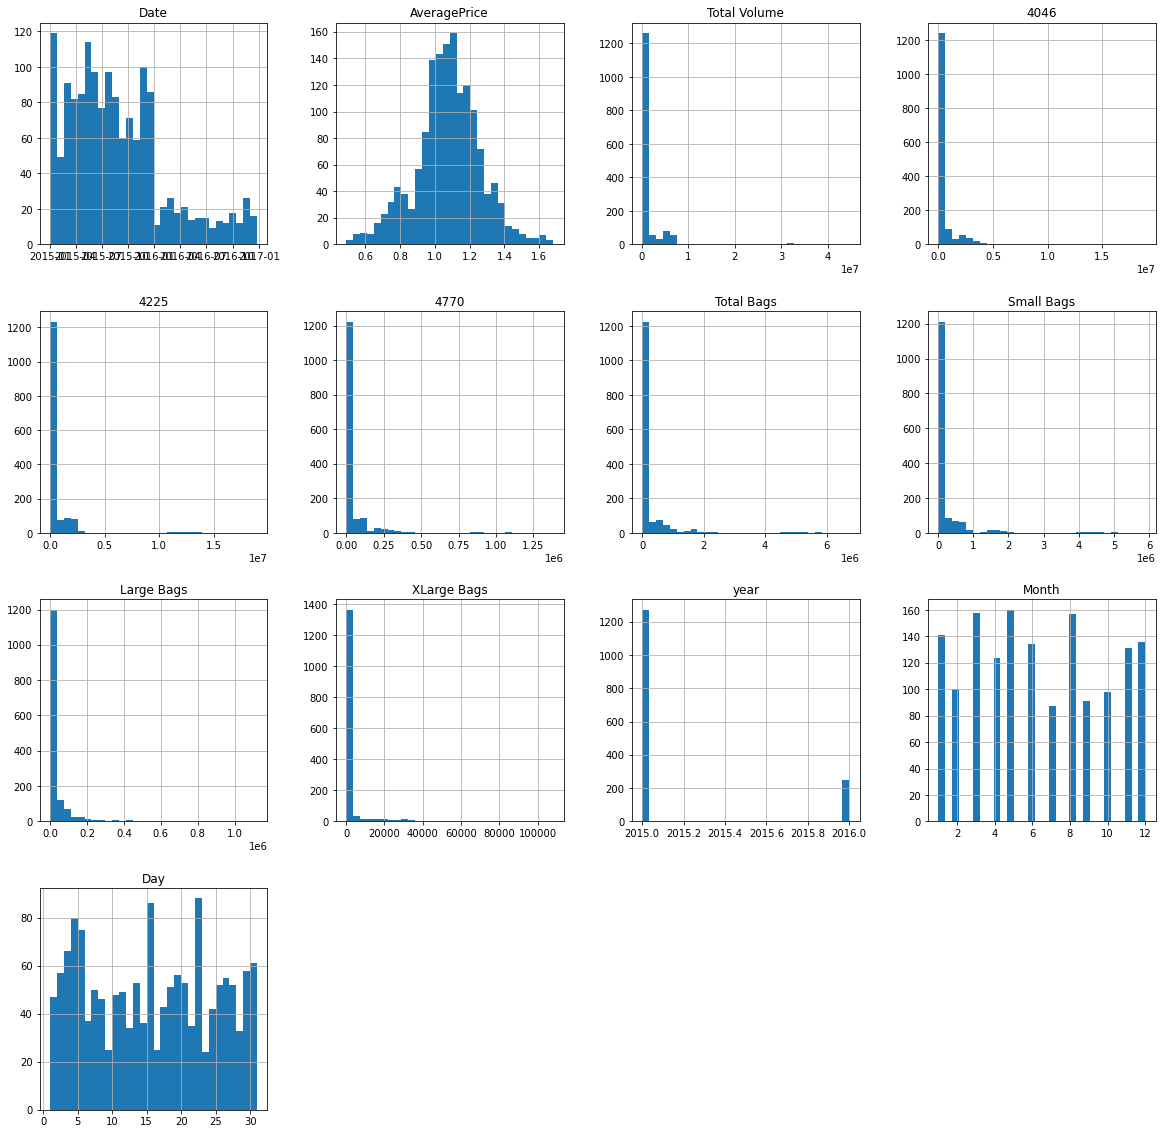

In [19]:
df.hist(figsize=(20,20),grid=True, layout=(4,4),bins=30)

Average price column is normally distributing over the histogram.
Rest of the data are not much varying in term of numbers, so they are almost left skewed data
To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.

In [20]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

In [22]:
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [23]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Month              AxesSubplot(0.125,0.321957;0.133621x0.16413)
Day             AxesSubplot(0.285345,0.321957;0.133621x0.16413)
dtype: object

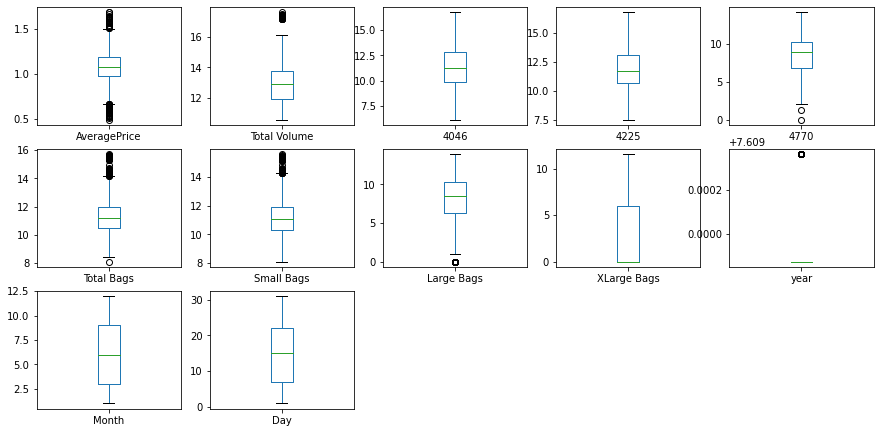

In [24]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

In [28]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
Month                    int64
Day                      int64
dtype: object

In [39]:
df=df.drop(['Date','region','type'],axis=1)

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(z)

[[1.35048079 1.35676174 1.82816171 ... 0.44100815 1.62415427 1.31052998]
 [1.45639674 1.46638736 2.01206913 ... 0.44100815 1.62415427 0.52953678]
 [0.76783831 0.9321394  1.94183376 ... 0.44100815 1.62415427 0.25145642]
 ...
 [2.14485045 0.64565294 0.20190426 ... 2.26753179 1.25685839 0.58616779]
 [2.09189247 0.60503087 0.13577946 ... 2.26753179 0.75985047 1.08738906]
 [1.88006056 0.62805557 0.23299293 ... 2.26753179 0.75985047 0.30639586]]


In [41]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([   0,    0,    0, ..., 1516, 1516, 1516], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(1517, 12)


In [42]:
df1=df[(z<3).all(axis=1)]

In [43]:
df1.shape

(1502, 12)

# model selection

In [44]:
x=df1.drop("AveragePrice",axis=1)
y=df1["AveragePrice"]

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# linear regression

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [49]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.11111216865185762
MSE: 0.019057489117803555
RMSE: 0.13804886496383648


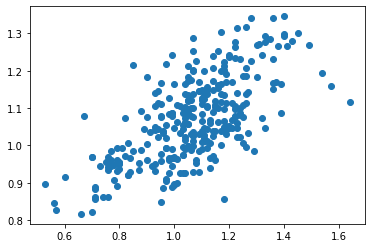

In [50]:
plt.scatter(x=y_test,y=pred)

The RMSE is low so we can say that we do have a good model,we don't have a straight line so I am not sure that this is the best model

# decision tree regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

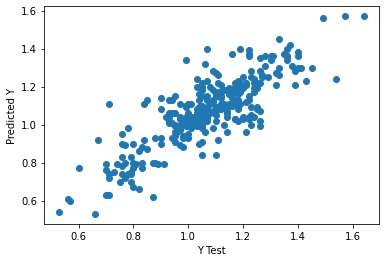

In [52]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.07754152823920264
MSE: 0.01119800664451827
RMSE: 0.10582063430408206


we nearly have a straight line, in other words its better than the Linear regression model,our RMSE is lower than the previous one we got with Linear Regression

# random forest regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.05831827242524922
MSE: 0.006273763588039879
RMSE: 0.07920709304121619


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

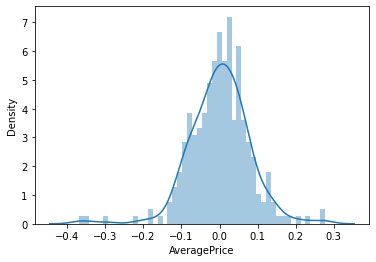

In [56]:
sns.distplot((y_test-pred),bins=50)

 Well as we can see the RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case. our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.



,Y Test,Pred
1119,1.36,1.2800
643,1.12,1.2294
422,1.14,1.1632
413,1.16,1.0913
451,0.78,0.7715


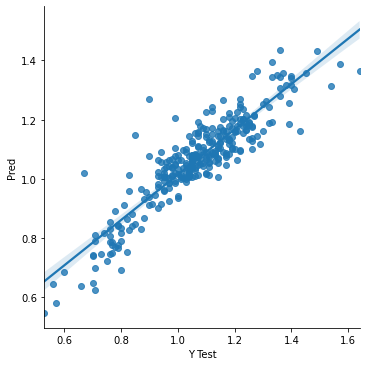

In [57]:

data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Hyper Tunning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
parameter= {  'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [61]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [62]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [63]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 15}

In [67]:
final_mod=RandomForestRegressor(bootstrap='True',max_depth='None',max_features='log2',n_estimators=15)




# SAVING THE MODEL

In [68]:
import joblib
joblib.dump(final_mod,"AVOCADO.pkl")

['AVOCADO.pkl']